<a href="https://colab.research.google.com/github/Marta7bs/biciMAD-hypothesis-testing/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Parte 1: Estudio de una población


In [ ]:
# cargar datos
trips <- read.csv("trips_22_03_March.csv", sep=";")
trips

fecha,idTrip,idBike,fleet,trip_minutes,geolocation_unlock,address_unlock,unlock_date,locktype,unlocktype,geolocation_lock,address_lock,lock_date,station_unlock,dock_unlock,unlock_station_name,station_lock,dock_lock,lock_station_name
<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>
,,NA,NA,NA,,,,,,,,,,NA,,NA,NA,
2022-03-01,51226187N_7837_2022-03-01T00:07:41,7837,1,7.28,"{'type': 'Point', 'coordinates': [-3.7095084, 40.4156057]}",,2022-03-01T00:00:24,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7188898, 40.4309797]}",,2022-03-01T00:07:41,10,4,Plaza de San Miguel,125,17,Altamirano
,,NA,NA,NA,,,,,,,,,,NA,,NA,NA,
2022-03-01,06033371B_7292_2022-03-01T00:07:58,7292,1,7.57,"{'type': 'Point', 'coordinates': [-3.65779, 40.41053]}",,2022-03-01T00:00:24,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6784838, 40.4082805]}",,2022-03-01T00:07:58,226,19,Camino Vinateros,79,19,Menéndez Pelayo
,,NA,NA,NA,,,,,,,,,,NA,,NA,NA,
2022-03-01,70941410A_7925_2022-03-01T00:21:02,7925,1,19.95,"{'type': 'Point', 'coordinates': [-3.65779, 40.41053]}",,2022-03-01T00:01:05,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7172213778842007, 40.40765396169372]}",,2022-03-01T00:21:02,226,21,Camino Vinateros,244,19,Paseo Imperial
,,NA,NA,NA,,,,,,,,,,NA,,NA,NA,
2022-03-01,X9099015P_7657_2022-03-01T00:20:48,7657,1,19.68,"{'type': 'Point', 'coordinates': [-3.7170448, 40.4253944]}",,2022-03-01T00:01:07,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6615277, 40.4250833]}",,2022-03-01T00:20:48,122,23,Ferraz,193,8,Quinta Fuente del Berro
,,NA,NA,NA,,,,,,,,,,NA,,NA,NA,


### Análisis exploratorio y preprocesamiento del dataset

In [ ]:
# conteo de instancias
length(trips$trip_minutes)

# eliminar valores nulos
trips <- unique(trips)
length(trips$trip_minutes)

[1] 554382

[1] 277192

In [ ]:
#resumen de la columna trip_minutes
summary(trips$trip_minutes)


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
   -0.07     6.28    10.73    21.61    16.30 38880.75        1 

In [ ]:
# eliminar viajes con tiempo negativos (esto no es posible). Mantenemos solo trip_minutes > 1
trips <- trips[!is.na(trips$trip_minutes), ]
trips <- subset(trips, trips$trip_minutes > 1)
length(trips$trip_minutes)

[1] 232474

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    1.02     7.98    11.88    24.56    17.25 38880.75 

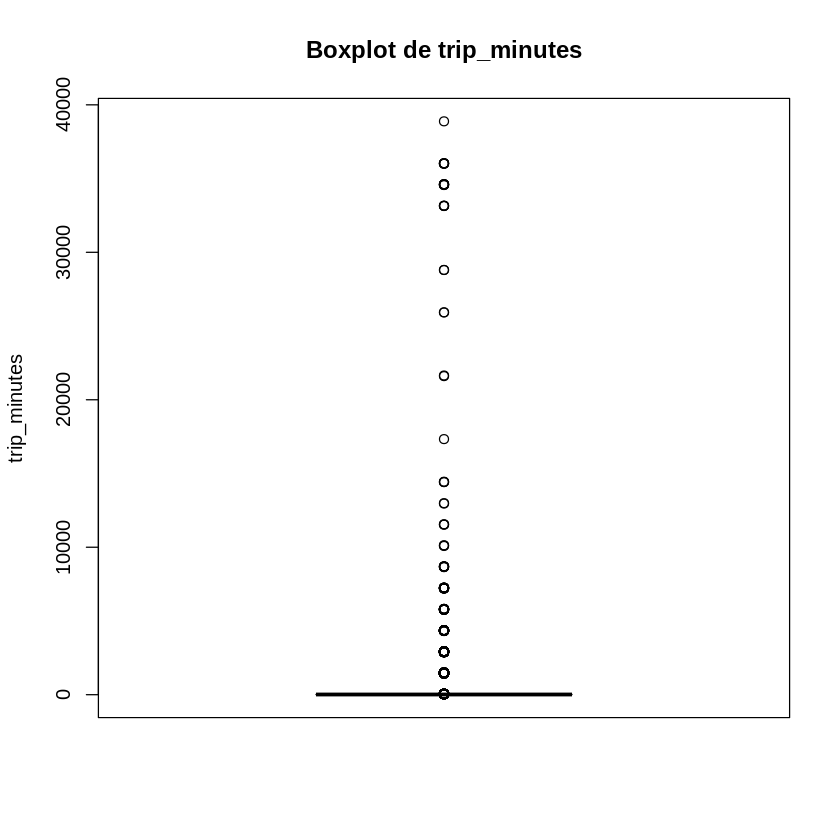

In [ ]:
# análisis exploratorio tras eliminar nulos y viajes negativos
summary(trips$trip_minutes)
boxplot(trips$trip_minutes,
        main = "Boxplot de trip_minutes",
        ylab = "trip_minutes",
        col = "lightblue")


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.02    7.82   11.50   12.49   16.32   31.15 

[1] 19

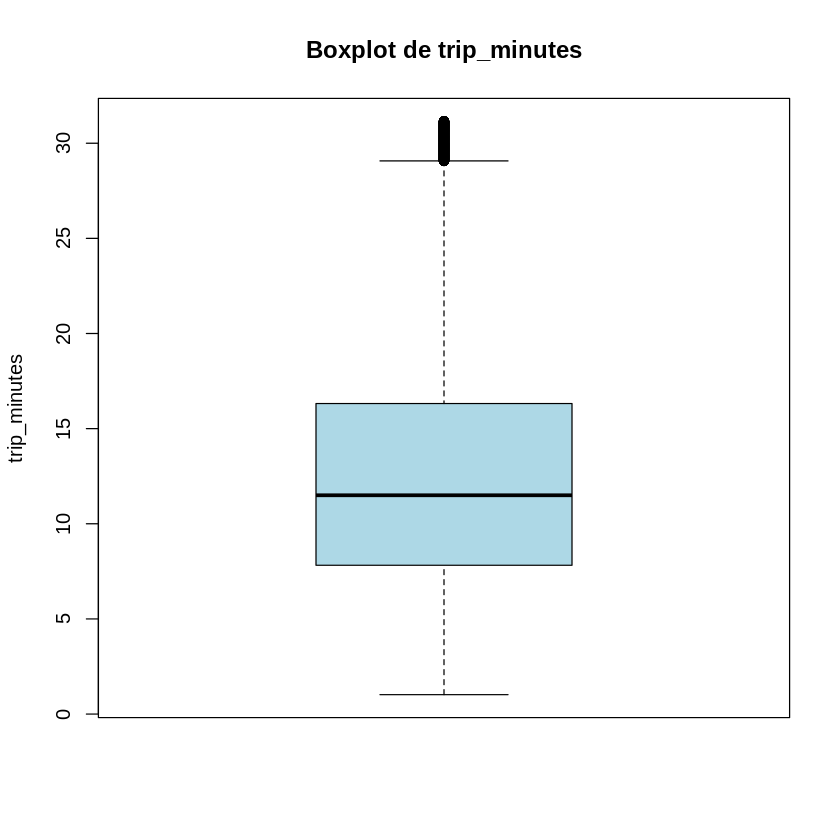

In [ ]:
# utilizamos la regla IQR para eliminar outliers. Omitimos valores fuera de [Q1-1.5*IQR, QR+1.5*IQR]

iqr <- IQR(trips$trip_minutes)
q1 <- quantile(trips$trip_minutes, 0.25)
q3 <- quantile(trips$trip_minutes, 0.75)


lim_inf <- q1 - 1.5 * iqr
lim_sup <- q3 + 1.5 * iqr

trips <- subset(trips, trips$trip_minutes >= lim_inf & trips$trip_minutes <= lim_sup)

# análisis exploratorio tras eliminar outliers
boxplot(trips$trip_minutes,
        main = "Boxplot de trip_minutes",
        ylab = "trip_minutes",
        col = "lightblue")
summary(trips$trip_minutes)
length(trips)


### T-test y visualización de gráfico de densidades

In [ ]:
# h0: µ = 55
# h1 : µ > 55
# cola derecha unilateral
# t test - varianza desconocida
# fijamos alpha = 0.05
trip_mins <- trips$trip_minutes
mu <- 12
tres <- t.test(trip_mins, mu = mu, alternative="greater", conf.level = 0.95)
tres


	One Sample t-test

data:  trip_mins
t = 37.831, df = 232473, p-value < 2.2e-16
alternative hypothesis: true mean is greater than 12
95 percent confidence interval:
 12.46784      Inf
sample estimates:
mean of x 
 12.48911 


[1] 37.83095

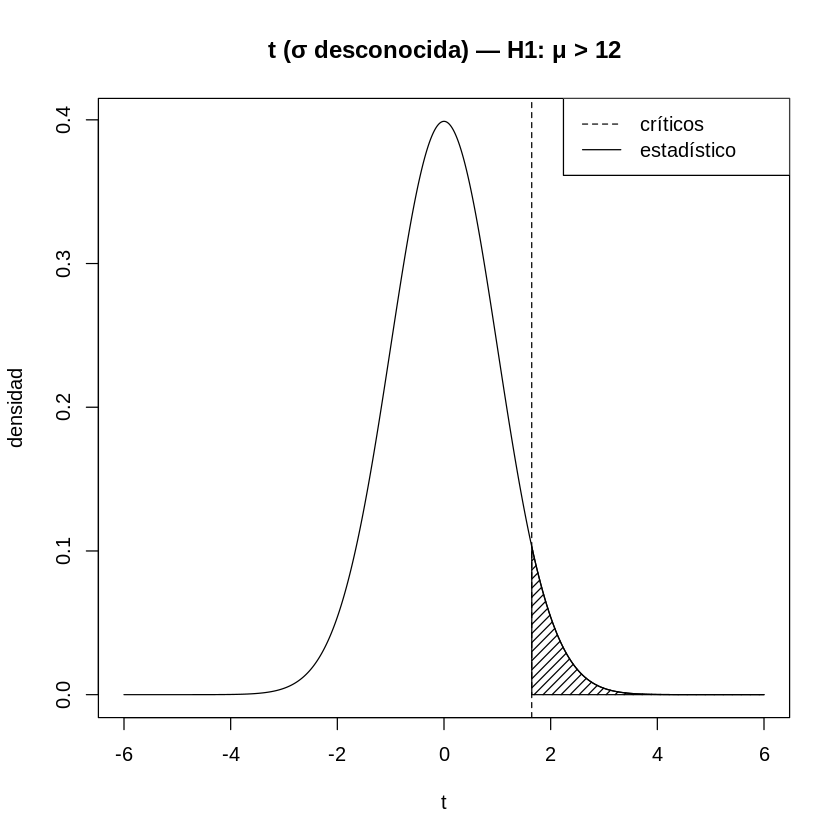

In [ ]:
alpha <- 0.05
n <- length(trip_mins)
xbar <- mean(trip_mins)
s <- sd(trip_mins)
tstat <- (xbar - mu) / (s / sqrt(n))
tcrit <- qt(1 - alpha, df=n-1)

xs <- seq(-6, 6, length.out=4000)
ys <- dt(xs, df=n-1)

plot(xs, ys, type="l", main="t (σ desconocida) — H1: μ > 12",
     xlab="t", ylab="densidad")

# sombrear colas
xr <- xs[xs >=  tcrit]
polygon(c(xr, rev(xr)), c(dt(xr, n-1), rep(0, length(xr))), density=20, angle=45)

abline(v=tcrit, lty=2)
abline(v=tstat, lty=1)
legend("topright", legend=c("críticos", "estadístico"), lty=c(2,1))
tstat

## Parte 2: Estudio de dos poblaciones

In [ ]:
# librería para calcular dia_semana a partir de la fecha
# install.packages("lubridate")
# library(lubridate)
# library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘timechange’



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Preprocesamiento

In [ ]:
# calcular columna dia_semana a partir de la columna fecha
trips <- trips %>%
  mutate(
    fecha = ymd(fecha),
    dia_semana = wday(fecha, label = TRUE, abbr = FALSE, locale = "Spanish_Spain")
  )

trips


Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `dia_semana = wday(fecha, label = TRUE, abbr = FALSE, locale =
  "Spanish_Spain")`.
Caused by warning in `Sys.setlocale()`:
! OS reports request to set locale to "Spanish_Spain" cannot be honored”


,fecha,idTrip,idBike,fleet,trip_minutes,geolocation_unlock,address_unlock,unlock_date,locktype,unlocktype,geolocation_lock,address_lock,lock_date,station_unlock,dock_unlock,unlock_station_name,station_lock,dock_lock,lock_station_name,dia_semana
,<date>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<ord>
2,2022-03-01,51226187N_7837_2022-03-01T00:07:41,7837,1,7.28,"{'type': 'Point', 'coordinates': [-3.7095084, 40.4156057]}",,2022-03-01T00:00:24,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7188898, 40.4309797]}",,2022-03-01T00:07:41,10,4,Plaza de San Miguel,125,17,Altamirano,Tuesday
4,2022-03-01,06033371B_7292_2022-03-01T00:07:58,7292,1,7.57,"{'type': 'Point', 'coordinates': [-3.65779, 40.41053]}",,2022-03-01T00:00:24,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6784838, 40.4082805]}",,2022-03-01T00:07:58,226,19,Camino Vinateros,79,19,Menéndez Pelayo,Tuesday
6,2022-03-01,70941410A_7925_2022-03-01T00:21:02,7925,1,19.95,"{'type': 'Point', 'coordinates': [-3.65779, 40.41053]}",,2022-03-01T00:01:05,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7172213778842007, 40.40765396169372]}",,2022-03-01T00:21:02,226,21,Camino Vinateros,244,19,Paseo Imperial,Tuesday
8,2022-03-01,X9099015P_7657_2022-03-01T00:20:48,7657,1,19.68,"{'type': 'Point', 'coordinates': [-3.7170448, 40.4253944]}",,2022-03-01T00:01:07,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6615277, 40.4250833]}",,2022-03-01T00:20:48,122,23,Ferraz,193,8,Quinta Fuente del Berro,Tuesday
10,2022-03-01,Y2625804T_5394_2022-03-01T00:12:30,5394,2,11.20,"{'type': 'Point', 'coordinates': [-3.6837876, 40.4250361]}",,2022-03-01T00:01:18,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6987665, 40.4017926]}",,2022-03-01T00:12:30,95,4,Villanueva,129,10,Santa María de la Cabeza,Tuesday
14,2022-03-01,44091141A_4558_2022-03-01T00:08:33,4558,1,6.40,"{'type': 'Point', 'coordinates': [-3.7069171, 40.4302937]}",,2022-03-01T00:02:09,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7174158, 40.4277456]}",,2022-03-01T00:08:33,4,15,Plaza Conde Suchil,121,14,Quintana,Tuesday
16,2022-03-01,X1832879D_122_2022-03-01T00:08:35,122,1,6.05,"{'type': 'Point', 'coordinates': [-3.6708959, 40.4179237]}",,2022-03-01T00:02:32,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.670422, 40.40635]}",,2022-03-01T00:08:35,67,5,Ibiza,81,19,Conde de Casal,Tuesday
20,2022-03-01,51129889S_5794_2022-03-01T00:14:18,5794,1,11.57,"{'type': 'Point', 'coordinates': [-3.6935833, 40.4008888]}",,2022-03-01T00:02:44,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6659362429356372, 40.39382977920336]}",,2022-03-01T00:14:18,180,19,Delicias,236,12,Concordia,Tuesday
22,2022-03-01,71220433J_2133_2022-03-01T00:16:07,2133,1,12.83,"{'type': 'Point', 'coordinates': [-3.6917932, 40.4457414]}",,2022-03-01T00:03:17,STATION,STATION,"{'type': 'Point', 'coordinates': [-3.680008, 40.421501]}",,2022-03-01T00:16:07,154,19,Paseo de la Castellana con Raimundo Fernández,90,25,Puerta de Madrid,Tuesday


In [ ]:
# almacenar trip_minutes los fines de semana en trip_mins_weekend
trip_mins_weekend <- subset(trips, dia_semana %in% c("Saturday", "Sunday"))
trip_mins_weekend <- trip_mins_weekend$trip_minutes
length(trip_mins_weekend)

# almacenar trip_minutes entre semana en trip_mins_weekday
trip_mins_weekday <- subset(trips, dia_semana %in% c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday"))
trip_mins_weekday <- trip_mins_weekday$trip_minutes
length(trip_mins_weekday)

[1] 50605

[1] 181869

### T-test y visualización de gráfico de densidades

In [ ]:
tres2 <- t.test(trip_mins_weekend, trip_mins_weekday,
       alternative = "greater", conf.level=0.95)
tres2


	Welch Two Sample t-test

data:  trip_mins_weekend and trip_mins_weekday
t = 0.44405, df = 78505, p-value = 0.3285
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -0.03847809         Inf
sample estimates:
mean of x mean of y 
 12.50024  12.48601 


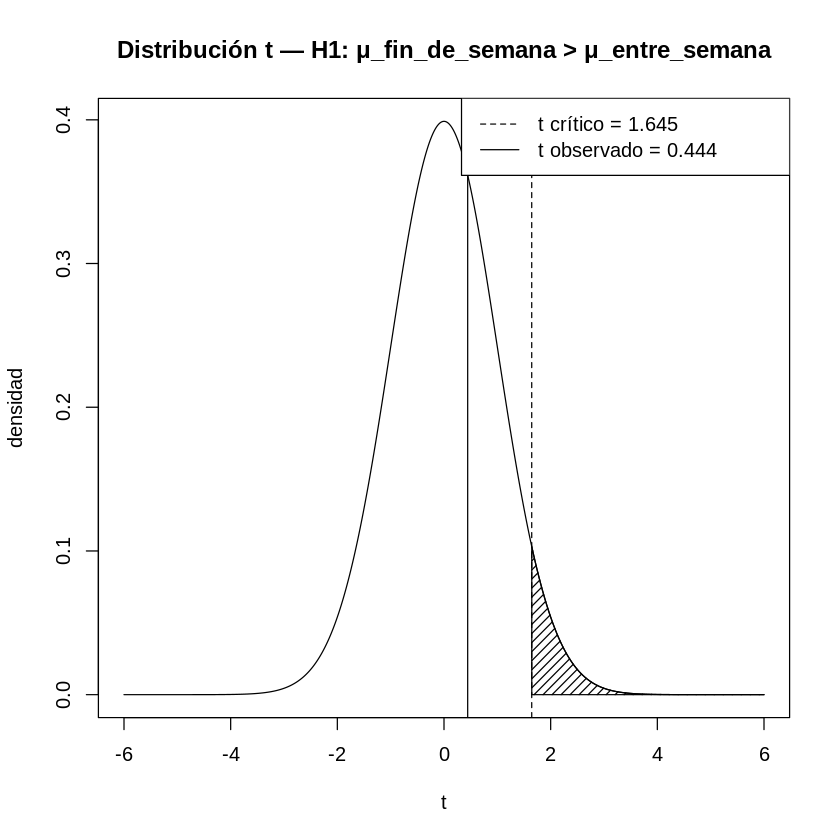

In [ ]:
tstat <- tres2$statistic
df <- tres2$parameter
alpha <- 0.05
tcrit <- qt(1 - alpha, df = df)

xs <- seq(-6, 6, length.out = 4000)
ys <- dt(xs, df = df)

plot(xs, ys, type = "l",
     main = "Distribución t — H1: μ_fin_de_semana > μ_entre_semana",
     xlab = "t", ylab = "densidad")

# sombrear cola
xr <- xs[xs >= tcrit]
polygon(
  c(xr, rev(xr)),
  c(dt(xr, df), rep(0, length(xr))),
  density = 20, angle = 45)

abline(v = tcrit, lty = 2)
abline(v = tstat, lty = 1)

legend("topright",
       legend = c(
         sprintf("t crítico = %.3f", tcrit),
         sprintf("t observado = %.3f", tstat)
       ),
       lty = c(2, 1))

In [ ]:
# guardar dataset preprocesado
# write.csv(trips, "trips_22_03_March_preprocesado.csv", row.names = FALSE)